# Introducing Scikit-Learn

There are several Python libraries that provide solid implementations of a range of machine learning algorithms.
One of the best known is [Scikit-Learn](http://scikit-learn.org), a package that provides efficient versions of a large number of common algorithms.
Scikit-Learn is characterized by a clean, uniform, and streamlined API, as well as by very useful and complete online documentation.
A benefit of this uniformity is that once you understand the basic use and syntax of Scikit-Learn for one type of model, switching to a new model or algorithm is straightforward.

This chapter provides an overview of the Scikit-Learn API. A solid understanding of these API elements will form the foundation for understanding the deeper practical discussion of machine learning algorithms and approaches in the following chapters.

We will start by covering data representation in Scikit-Learn, then delve into the Estimator API, and finally go through a more interesting example of using these tools for exploring a set of images of handwritten digits.

## Data Representation in Scikit-Learn

Machine learning is about creating models from data: for that reason, we'll start by discussing how data can be represented.
The best way to think about data within Scikit-Learn is in terms of *tables*.

A basic table is a two-dimensional grid of data, in which the rows represent individual elements of the dataset, and the columns represent quantities related to each of these elements.
For example, consider the [Iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set), famously analyzed by Ronald Fisher in 1936.
We can download this dataset in the form of a Pandas `DataFrame` using the [Seaborn](http://seaborn.pydata.org/) library, and take a look at the first few items:

> The Iris dataset is a famous dataset that is used a lot in machine learning 
> education. It was also used in Data Science 1 / Data & AI 2, where it was
> one of the built-in datasets in the Orange data mining tool.
> 
> As the Orange data mining tool has built-in datasets as example datasets, 
> Python libraries can also have built-in datasets. E.g. the Seaborn library, 
> used for data visualisation, has some built-in datasets. These sample datasets 
> can be loaded using the 'load_dataset' method of seaborn.
> 
> Mind that the way example datasets are loaded (the exact syntax of the function 
> or method to load the data) is library dependent; as described above, Seaborn 
> defines the method 'load_dataset' for loading example datasets.  
> 
> To see all available example datasets in Seaborn, use the 'get_dataset_names' 
> method.

In [59]:
import seaborn as sns
sampledatasets = sns.get_dataset_names()
print(sampledatasets)

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [60]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Here each row of the data refers to a single observed flower, and the number of rows is the total number of flowers in the dataset.
In general, we will refer to the rows of the matrix as *samples*, and the number of rows as `n_samples`.

Likewise, each column of the data refers to a particular quantitative piece of information that describes each sample.
In general, we will refer to the columns of the matrix as *features*, and the number of columns as `n_features`.

### The Features Matrix

The table layout makes clear that the information can be thought of as a two-dimensional numerical array or matrix, which we will call the *features matrix*.
By convention, this matrix is often stored in a variable named `X`.
The features matrix is assumed to be two-dimensional, with shape `[n_samples, n_features]`, and is most often contained in a NumPy array or a Pandas `DataFrame`, though some Scikit-Learn models also accept SciPy sparse matrices.

The samples (i.e., rows) always refer to the individual objects described by the dataset.
For example, a sample might represent a flower, a person, a document, an image, a sound file, a video, an astronomical object, or anything else you can describe with a set of quantitative measurements.

The features (i.e., columns) always refer to the distinct observations that describe each sample in a quantitative manner.
Features are often real-valued, but may be Boolean or discrete-valued in some cases.

### The Target Array

In addition to the feature matrix `X`, we also generally work with a *label* or *target* array, which by convention we will usually call `y`.
The target array is usually one-dimensional, with length `n_samples`, and is generally contained in a NumPy array or Pandas `Series`.
The target array may have continuous numerical values, or discrete classes/labels.
While some Scikit-Learn estimators do handle multiple target values in the form of a two-dimensional, `[n_samples, n_targets]` target array, we will primarily be working with the common case of a one-dimensional target array.

A common point of confusion is how the target array differs from the other feature columns. The distinguishing characteristic of the target array is that it is usually the quantity we want to *predict from the features*: in statistical terms, it is the dependent variable.
For example, given the preceding data we may wish to construct a model that can predict the species of flower based on the other measurements; in this case, the `species` column would be considered the target array.

With this target array in mind, we can use Seaborn (discussed in [Visualization With Seaborn](04.14-Visualization-With-Seaborn.ipynb)) to conveniently visualize the data (see the following figure):

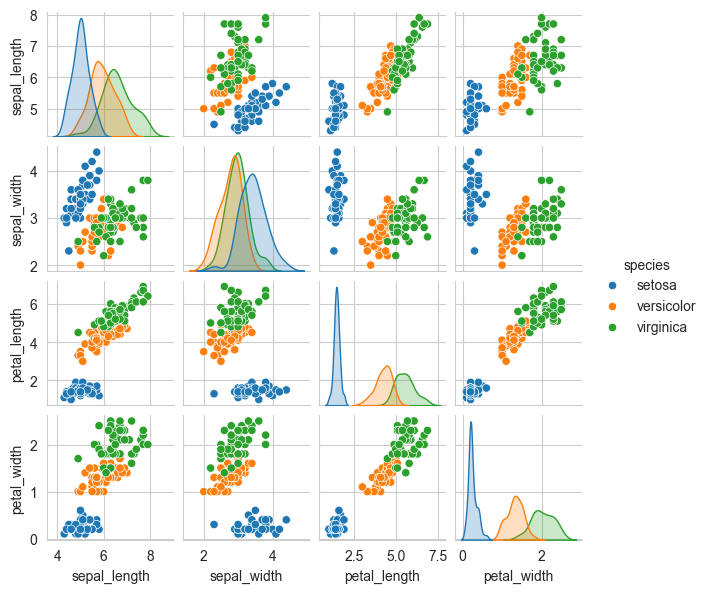

In [61]:
%matplotlib inline
import seaborn as sns
sns.pairplot(iris, hue='species', height=1.5);

For use in Scikit-Learn, we will extract the features matrix and target array from the `DataFrame`, which we can do using some of the Pandas `DataFrame` operations discussed in [Part 3](03.00-Introduction-to-Pandas.ipynb):

In [62]:
# Extract feature matrix (matrix with independent/predictor variables)
# (by deleting the target variable)
X_iris = iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [63]:
X_iris

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [64]:
# Extract target array (vector with dependent/target variable)
y_iris = iris['species']
y_iris.shape

(150,)

In [65]:
y_iris

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

To summarize, the expected layout of features and target values is visualized in the following figure.

![](images/05.02-samples-features.png)
[figure source in Appendix](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/06.00-Figure-Code.ipynb#Features-and-Labels-Grid)

With this data properly formatted, we can move on to consider Scikit-Learn's Estimator API.

## The Estimator API

The Scikit-Learn API is designed with the following guiding principles in mind, as outlined in the [Scikit-Learn API paper](http://arxiv.org/abs/1309.0238):

- *Consistency*: All objects share a common interface drawn from a limited set of methods, with consistent documentation.

- *Inspection*: All specified parameter values are exposed as public attributes.

- *Limited object hierarchy*: Only algorithms are represented by Python classes; datasets are represented
  in standard formats (NumPy arrays, Pandas `DataFrame` objects, SciPy sparse matrices) and parameter
  names use standard Python strings.

- *Composition*: Many machine learning tasks can be expressed as sequences of more fundamental algorithms,
  and Scikit-Learn makes use of this wherever possible.

- *Sensible defaults*: When models require user-specified parameters, the library defines an appropriate default value.

In practice, these principles make Scikit-Learn very easy to use, once the basic principles are understood.
Every machine learning algorithm in Scikit-Learn is implemented via the Estimator API, which provides a consistent interface for a wide range of machine learning applications.

### Basics of the API

Most commonly, the steps in using the Scikit-Learn Estimator API are as follows:

1. Choose a class of model by importing the appropriate estimator class from Scikit-Learn.
2. Choose model hyperparameters by instantiating this class with desired values.
3. Arrange data into a features matrix and target vector, as outlined earlier in this chapter.
4. Fit the model to your data by calling the `fit` method of the model instance.
5. Apply the model to new data:
   - For supervised learning, often we predict labels for unknown data using the `predict` method.
   - For unsupervised learning, we often transform or infer properties of the data using the `transform` or `predict` method.

We will now step through several simple examples of applying supervised and unsupervised learning methods.

### Supervised Learning Example: Simple Linear Regression

As an example of this process, let's consider a simple linear regression—that is, the common case of fitting a line to $(x, y)$ data.
We will use the following simple data for our regression example (see the following figure):

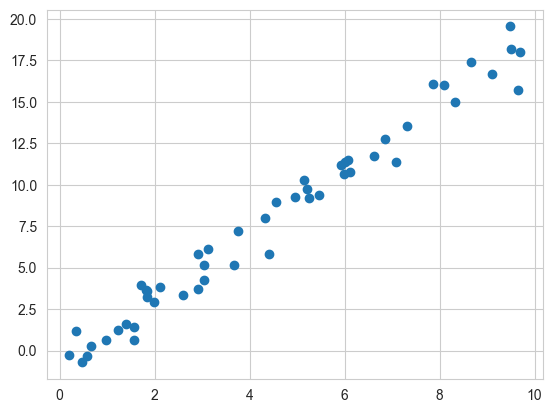

In [66]:
import matplotlib.pyplot as plt
import numpy as np

# Generate random data around a straight line with intercept -1 and slope 2
# Set seed value of random number generator
rng = np.random.RandomState(42)
# Generate 50 random numbers between 0 and 10
#   rand(x) will generate x random numbers, uniformly distributed between 0 
#   and 1, hence rand(50) will generate 50 random numbers between 0 and 1
#   by multiplying these number by 10, the result will be 50 random numbers 
#   between 0 and 10
x = 10 * rng.rand(50)
# Generate 50 numbers around a straight line with intercept -1 and slope 2
#   2 * x - 1 will calculate numbers based on the previously generated 
#   x-values according to the formula y = -1 + 2.x (straight line with 
#   intercept -1 and slope 2). 
#   As x contains 50 random numbers between 0 and 10, the result will be 50 
#   numbers between -1 and 20 following the pattern y = -1 + 2.x
#   To get numbers with some variation around the straight line, a small 
#   random factors is added using randn(x)
#   randn(x) will generate x random numbers, normally distributed with mean 0 
#   and standard deviation 1, hence randn(50) will generate 50 normally 
#   distributed numbers with mean 0 and standard deviation 1.
#   
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y);

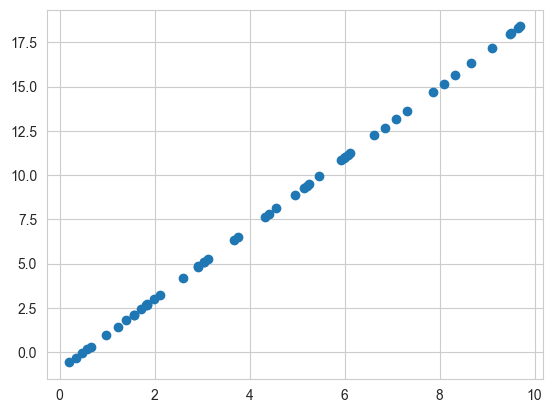

In [67]:
# If no random factor would be added when y-values are calculated, the result 
# would be the straight line with intercept -1 and slope 2
y2 = 2 * x - 1
plt.scatter(x, y2)

# That is not what we want, to illustrate the regression, we want data points 
# that vary around a straight line with intercept -1 and slope 2 and we want 
# the regression to indeed find out that the best fitting line is a straight 
# line with intercept -1 and slope 2. 

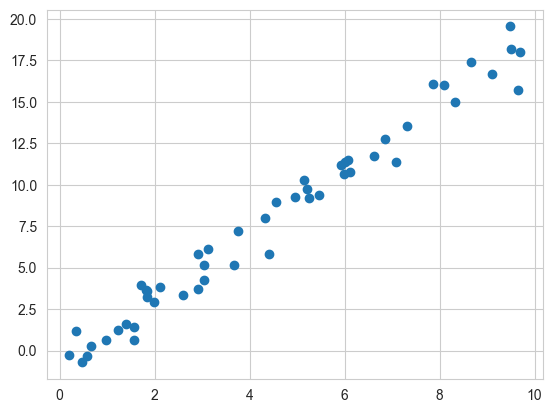

In [68]:
# So this is our example data
plt.scatter(x, y)
# The idea is that the linear regression will find out that the best fitting 
# line is a line with intercept -1 and slope 2


With this data in place, we can use the recipe outlined earlier. Let's walk through the process: 

#### 1. Choose a class of model

In Scikit-Learn, every class of model is represented by a Python class.
So, for example, if we would like to compute a simple `LinearRegression` model, we can import the linear regression class:

In [69]:
from sklearn.linear_model import LinearRegression

Note that other more general linear regression models exist as well; you can read more about them in the [`sklearn.linear_model` module documentation](http://Scikit-Learn.org/stable/modules/linear_model.html).

#### 2. Choose model hyperparameters

An important point is that *a class of model is not the same as an instance of a model*.

Once we have decided on our model class, there are still some options open to us.
Depending on the model class we are working with, we might need to answer one or more questions like the following:

- Would we like to fit for the offset (i.e., *y*-intercept)?
- Would we like the model to be normalized?
- Would we like to preprocess our features to add model flexibility?
- What degree of regularization would we like to use in our model?
- How many model components would we like to use?

These are examples of the important choices that must be made *once the model class is selected*.
These choices are often represented as *hyperparameters*, or parameters that must be set before the model is fit to data.
In Scikit-Learn, hyperparameters are chosen by passing values at model instantiation.
We will explore how you can quantitatively choose hyperparameters in [Hyperparameters and Model Validation](05.03-Hyperparameters-and-Model-Validation.ipynb).

For our linear regression example, we can instantiate the `LinearRegression` class and specify that we would like to fit the intercept using the `fit_intercept` hyperparameter:

In [70]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression()

Keep in mind that when the model is instantiated, the only action is the storing of these hyperparameter values.
In particular, we have not yet applied the model to any data: the Scikit-Learn API makes very clear the distinction between *choice of model* and *application of model to data*.

#### 3. Arrange data into a features matrix and target vector

Previously we examined the Scikit-Learn data representation, which requires a two-dimensional features matrix and a one-dimensional target array.
Here our target variable `y` is already in the correct form (a length-`n_samples` array), but we need to massage the data `x` to make it a matrix of size `[n_samples, n_features]`.
In this case, this amounts to a simple reshaping of the one-dimensional array:

In [71]:
# y was created as a 1-dimensional Numpy array and hence ready to use 
# with scikit-Learn
print(type(y))
print(y.shape)
print(y)

<class 'numpy.ndarray'>
(50,)
[ 7.22926896 18.18565441 13.52423055 10.67206599  0.64185082  1.4000462
 -0.29896653 17.38064514 11.36591852 11.3984114  -0.26422614 18.01311476
 14.97193082  3.8584585   3.66749887  3.59937032  4.24562734  9.18591626
  7.9701638   5.80012793 10.75788366  1.60421824  3.736558    5.13103024
  8.93392551 16.05975926  2.92146552 10.28822167 11.2099274  -0.7161115
 11.51229264  3.94851904  0.26520582 19.5423544  15.69289556 15.98984947
  5.17932245  0.65443493 12.77642131  5.81548096  1.22109281  9.26065077
  1.16566447 16.66813782  3.36710603 11.74868864  6.14962364  9.73011153
  9.40444538  3.21035654]


In [72]:
# x was also created as an 1-dimensional Numpy array
print(type(x))
print(x.shape)
print(x)

<class 'numpy.ndarray'>
(50,)
[3.74540119 9.50714306 7.31993942 5.98658484 1.5601864  1.5599452
 0.58083612 8.66176146 6.01115012 7.08072578 0.20584494 9.69909852
 8.32442641 2.12339111 1.81824967 1.8340451  3.04242243 5.24756432
 4.31945019 2.9122914  6.11852895 1.39493861 2.92144649 3.66361843
 4.56069984 7.85175961 1.99673782 5.14234438 5.92414569 0.46450413
 6.07544852 1.70524124 0.65051593 9.48885537 9.65632033 8.08397348
 3.04613769 0.97672114 6.84233027 4.40152494 1.22038235 4.9517691
 0.34388521 9.09320402 2.58779982 6.62522284 3.11711076 5.20068021
 5.46710279 1.84854456]


In [73]:
# Mind that scikit-learn requires a 2-dimensional data structure as feature 
# matrix. Using x as a feature matrix will result in an runtime error (see 
# later) because it is a 1-dimensional Numpy array (see the result of the
# 'x.shape' statement).
# The 1-dimensional Numpy array (vector) needs to be converted into a 
# 2-dimensional Numpy array (2-dimensional matrix)
# This might seem strange, as there is only one independent variable. Yet 
# the 1-dimensional Numpy array needs to be converted into a 2-dimensional
# Numpy array, be it with only one column.
# The following codes transforms an array into a single column matrix.
X = x[:, np.newaxis]
print(X)
print(X.shape)
print(type(X))


<class 'numpy.ndarray'>
[[3.74540119]
 [9.50714306]
 [7.31993942]
 [5.98658484]
 [1.5601864 ]
 [1.5599452 ]
 [0.58083612]
 [8.66176146]
 [6.01115012]
 [7.08072578]
 [0.20584494]
 [9.69909852]
 [8.32442641]
 [2.12339111]
 [1.81824967]
 [1.8340451 ]
 [3.04242243]
 [5.24756432]
 [4.31945019]
 [2.9122914 ]
 [6.11852895]
 [1.39493861]
 [2.92144649]
 [3.66361843]
 [4.56069984]
 [7.85175961]
 [1.99673782]
 [5.14234438]
 [5.92414569]
 [0.46450413]
 [6.07544852]
 [1.70524124]
 [0.65051593]
 [9.48885537]
 [9.65632033]
 [8.08397348]
 [3.04613769]
 [0.97672114]
 [6.84233027]
 [4.40152494]
 [1.22038235]
 [4.9517691 ]
 [0.34388521]
 [9.09320402]
 [2.58779982]
 [6.62522284]
 [3.11711076]
 [5.20068021]
 [5.46710279]
 [1.84854456]]
(50, 1)


In [81]:
# Both X and x are Numpy arrays containing the same 50 numbers
print(type(x))
print(type(X))
print(x[0:5])
print(X[0:5])

<class 'numpy.ndarray'>
(50,)
<class 'numpy.ndarray'>
(50, 1)
[3.74540119 9.50714306 7.31993942 5.98658484 1.5601864 ]
[[3.74540119]
 [9.50714306]
 [7.31993942]
 [5.98658484]
 [1.5601864 ]]


In [75]:
# Yet mind the difference:

# x is a 1-dimensional Numpy array (vector) with 50 elements
# (displays as a list)
print(x.shape)
# X is a 2-dimensional Numpy array (matrix) with 50 rows and 1 column
# (displqys as q list of lists)
print(X.shape)

(50,)
(50, 1)


#### 4. Fit the model to the data

Now it is time to apply our model to the data.
This can be done with the `fit` method of the model:

In [76]:
model.fit(X, y)

LinearRegression()

In [77]:
# Mind that trying to fit a model on the original feature matrix x will result 
# in a runtime error because x contains a 1-dimensional Numpy array and 
# scikit-learn requires a 2-dimensional feature matrix
model.fit(x, y)

ValueError: Expected 2D array, got 1D array instead:
array=[3.74540119 9.50714306 7.31993942 5.98658484 1.5601864  1.5599452
 0.58083612 8.66176146 6.01115012 7.08072578 0.20584494 9.69909852
 8.32442641 2.12339111 1.81824967 1.8340451  3.04242243 5.24756432
 4.31945019 2.9122914  6.11852895 1.39493861 2.92144649 3.66361843
 4.56069984 7.85175961 1.99673782 5.14234438 5.92414569 0.46450413
 6.07544852 1.70524124 0.65051593 9.48885537 9.65632033 8.08397348
 3.04613769 0.97672114 6.84233027 4.40152494 1.22038235 4.9517691
 0.34388521 9.09320402 2.58779982 6.62522284 3.11711076 5.20068021
 5.46710279 1.84854456].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

This `fit` command causes a number of model-dependent internal computations to take place, and the results of these computations are stored in model-specific attributes that the user can explore.
In Scikit-Learn, by convention all model parameters that were learned during the `fit` process have trailing underscores; for example in this linear model, we have the following:

In [ ]:
model.coef_

In [ ]:
model.intercept_

These two parameters represent the slope and intercept of the simple linear fit to the data.
Comparing the results to the data definition, we see that they are close to the values used to generate the data: a slope of 2 and intercept of –1.

One question that frequently comes up regards the uncertainty in such internal model parameters.
In general, Scikit-Learn does not provide tools to draw conclusions from internal model parameters themselves: interpreting model parameters is much more a *statistical modeling* question than a *machine learning* question.
Machine learning instead focuses on what the model *predicts*.
If you would like to dive into the meaning of fit parameters within the model, other tools are available, including the [`statsmodels` Python package](http://statsmodels.sourceforge.net/).

> Mind that scikit-learn does allow to validate models by assessing the 
> predictive power of models (how well the model predicts values) by 
> calculating validation metrics like MAE, MAPE, RMSE and R2 (regression) and accuracy, 
> precision and recall (classification) - see Data Science 1 / Data & AI 2 (we 
> will see later how to do this with scikit-learn). 
>
> What is mentioned here is that scikit-learn does not have tools to asses the
> quality/certainty of the specific estimated parameters or results of a 
> specific model type directly (like intercept and slope for a linear 
> regression model). Quality can only be assessed indirectly by predicting data
> for which the outcome is known and compare predicted values with the real 
> values (see later). 

#### 5. Predict labels for unknown data

Once the model is trained, the main task of supervised machine learning is to evaluate it based on what it says about new data that was not part of the training set.
In scikit-learn, this can be done using the `predict` method.
For the sake of this example, our "new data" will be a grid of *x* values, and we will ask what *y* values the model predicts:

In [ ]:
# As an example, generate 50 new numbers as features, i.e. numbers between 0 
# and 10. Instead of 50 random numbers, we take 50 numbers evenly distributed 
# over the interval from 0 to 10. The Numpy method 'linspace' can be used for 
# that.
# The following statement will generate 50 evenly distributed numbers between 
# -1 and 11 ('linespace by default will generate 50 numbers, and we now 
# generate numbers from -1 to 11 to see how well the model can predict numbers
# outside the range of numbers that were used to train the model)
xfit = np.linspace(-1, 11)
xfit

As before, we need to coerce these *x* values into a `[n_samples, n_features]` features matrix, after which we can feed it to the model:

In [ ]:
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

Finally, let's visualize the results by plotting first the raw data, and then this model fit (see the following figure):

In [ ]:
plt.scatter(x, y)
plt.plot(xfit, yfit);

Typically the efficacy of the model is evaluated by comparing its results to some known baseline, as we will see in the next example.

### Supervised Learning Example: Iris Classification

Let's take a look at another example of this process, using the Iris dataset we discussed earlier.
Our question will be this: given a model trained on a portion of the Iris data, how well can we predict the remaining labels?

For this task, we will use a simple generative model known as *Gaussian naive Bayes*, which proceeds by assuming each class is drawn from an axis-aligned Gaussian distribution (see [In Depth: Naive Bayes Classification](05.05-Naive-Bayes.ipynb) for more details).
Because it is so fast and has no hyperparameters to choose, Gaussian naive Bayes is often a good model to use as a baseline classification, before exploring whether improvements can be found through more sophisticated models.

> Gaussian naive Bayes was not covered in Data Science 1 / Data & A.I. 2. It is 
> just used here to illustrative the use of scikit-learn. Later we will discuss 
> machine learning techniques with scikit-learn in more detail. 
> 
> The other concepts in this example should look familiar (split the labelled 
> data into a training dataset and validation dataset; calculate the accuracy 
> of the model based on the validation dataset). Later we will discuss 
> validation with scikit-learn in more detail.

We would like to evaluate the model on data it has not seen before, so we will split the data into a *training set* and a *testing set*.
This could be done by hand, but it is more convenient to use the `train_test_split` utility function:

In [ ]:
# To split the data into a training set and validation set, method 
# 'train-test-split' is used.  By default, it will split the data into 75% 
# train data and 25% validation data (this can be changed with the 'test_size'
# parameter). The 'random_state' parameter can be used to guide the random
# number generator for randomly selecting the data (a given 'random_state' 
# value will result in a reproducible output). 
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris,
                                                random_state=1)

With the data arranged, we can follow our recipe to predict the labels:

In [ ]:
from sklearn.naive_bayes import GaussianNB # 1. choose model class
model = GaussianNB()                       # 2. instantiate model
model.fit(Xtrain, ytrain)                  # 3. fit model to data
y_model = model.predict(Xtest)             # 4. predict on new data

Finally, we can use the ``accuracy_score`` utility to see the fraction of predicted labels that match their true values:

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

With an accuracy topping 97%, we see that even this very naive classification algorithm is effective for this particular dataset!

### Unsupervised Learning Example: Iris Dimensionality

As an example of an unsupervised learning problem, let's take a look at reducing the dimensionality of the Iris data so as to more easily visualize it.
Recall that the Iris data is four-dimensional: there are four features recorded for each sample.

The task of dimensionality reduction centers around determining whether there is a suitable lower-dimensional representation that retains the essential features of the data.
Often dimensionality reduction is used as an aid to visualizing data: after all, it is much easier to plot data in two dimensions than in four dimensions or more!

Here we will use *principal component analysis* (PCA; see [In Depth: Principal Component Analysis](05.09-Principal-Component-Analysis.ipynb)), which is a fast linear dimensionality reduction technique.
We will ask the model to return two components—that is, a two-dimensional representation of the data.

> As stated before, dimensionality reduction was not covered in Data Science 1 
> / Data & A.I. 2. This example here is pure for illustrative purpose on how 
> scikit-learn can be used for dimensionality reduction.

Following the sequence of steps outlined earlier, we have:

In [ ]:
from sklearn.decomposition import PCA  # 1. Choose the model class
model = PCA(n_components=2)            # 2. Instantiate the model
model.fit(X_iris)                      # 3. Fit to data
X_2D = model.transform(X_iris)         # 4. Transform the data

Now let's plot the results. A quick way to do this is to insert the results into the original Iris `DataFrame`, and use Seaborn's `lmplot` to show the results (see the following figure):

In [ ]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot(x="PCA1", y="PCA2", hue='species', data=iris, fit_reg=False);

We see that in the two-dimensional representation, the species are fairly well separated, even though the PCA algorithm had no knowledge of the species labels!
This suggests to us that a relatively straightforward classification will probably be effective on the dataset, as we saw before.

### Unsupervised Learning Example: Iris Clustering

Let's next look at applying clustering to the Iris data.
A clustering algorithm attempts to find distinct groups of data without reference to any labels.
Here we will use a powerful clustering method called a *Gaussian mixture model* (GMM), discussed in more detail in [In Depth: Gaussian Mixture Models](05.12-Gaussian-Mixtures.ipynb).
A GMM attempts to model the data as a collection of Gaussian blobs.

> Again, Gaussian Mixture Models were not covered in Data Science 1 / Data & 
> A.I. 2, but clustering in general was covered (k-means, hierarchical 
> clustering). Later we will see clustering with scikit-learn in more detail.
> This is just an illustrative example.

We can fit the Gaussian mixture model as follows:

In [ ]:
from sklearn.mixture import GaussianMixture      # 1. Choose the model class
model = GaussianMixture(n_components=3,
                        covariance_type='full')  # 2. Instantiate the model
model.fit(X_iris)                                # 3. Fit to data
y_gmm = model.predict(X_iris)                    # 4. Determine labels

As before, we will add the cluster label to the Iris ``DataFrame`` and use Seaborn to plot the results (see the following figure):

In [ ]:
iris['cluster'] = y_gmm
sns.lmplot(x="PCA1", y="PCA2", data=iris, hue='species',
           col='cluster', fit_reg=False);

By splitting the data by cluster number, we see exactly how well the GMM algorithm has recovered the underlying labels: the *setosa* species is separated perfectly within cluster 0, while there remains a small amount of mixing between *versicolor* and *virginica*.
This means that even without an expert to tell us the species labels of the individual flowers, the measurements of these flowers are distinct enough that we could *automatically* identify the presence of these different groups of species with a simple clustering algorithm!
This sort of algorithm might further give experts in the field clues as to the relationships between the samples they are observing.

## Application: Exploring Handwritten Digits

To demonstrate these principles on a more interesting problem, let's consider one piece of the optical character recognition problem: the identification of handwritten digits.
In the wild, this problem involves both locating and identifying characters in an image. Here we'll take a shortcut and use Scikit-Learn's set of preformatted digits, which is built into the library.

### Loading and Visualizing the Digits Data

We can use Scikit-Learn's data access interface to take a look at this data:

In [ ]:
# Load example dataset from scikit-learn
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

The images data is a three-dimensional array: 1,797 samples each consisting of an 8 × 8 grid of pixels.
Let's visualize the first hundred of these (see the following figure):

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')

In order to work with this data within Scikit-Learn, we need a two-dimensional, `[n_samples, n_features]` representation.
We can accomplish this by treating each pixel in the image as a feature, i.e. by flattening out the pixel arrays so that we have a length-64 array of pixel values representing each digit.
Additionally, we need the target array, which gives the previously determined label for each digit.
These two quantities are built into the digits dataset under the `data` and `target` attributes, respectively:

In [ ]:
X = digits.data
X.shape

In [ ]:
y = digits.target
y.shape

We see here that there are 1,797 samples and 64 features.

### Unsupervised Learning Example: Dimensionality Reduction

We'd like to visualize our points within the 64-dimensional parameter space, but it's difficult to effectively visualize points in such a high-dimensional space.
Instead, we'll reduce the number of dimensions, using an unsupervised method.
Here, we'll make use of a manifold learning algorithm called Isomap (see [In-Depth: Manifold Learning](05.10-Manifold-Learning.ipynb)) and transform the data to two dimensions:

In [ ]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
print(data_projected.shape)

We see that the projected data is now two-dimensional.
Let's plot this data to see if we can learn anything from its structure (see the following figure):

In [ ]:
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,
            edgecolor='none', alpha=0.5,
            cmap=plt.get_cmap('viridis', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5);

This plot gives us some good intuition into how well various numbers are separated in the larger 64-dimensional space. For example, zeros and ones have very little overlap in the parameter space.
Intuitively, this makes sense: a zero is empty in the middle of the image, while a one will generally have ink in the middle.
On the other hand, there seems to be a more or less continuous spectrum between ones and fours: we can understand this by realizing that some people draw ones with "hats" on them, which causes them to look similar to fours.

Overall, however, despite some mixing at the edges, the different groups appear to be fairly well localized in the parameter space: this suggests that even a very straightforward supervised classification algorithm should perform suitably on the full high-dimensional dataset.
Let's give it a try.

### Classification on Digits

Let's apply a classification algorithm to the digits data.
As we did with the Iris data previously, we will split the data into training and testing sets and fit a Gaussian naive Bayes model:

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

Now that we have the model's predictions, we can gauge its accuracy by comparing the true values of the test set to the predictions:

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

With even this very simple model, we find about 83% accuracy for classification of the digits!
However, this single number doesn't tell us where we've gone wrong. One nice way to do this is to use the *confusion matrix*, which we can compute with Scikit-Learn and plot with Seaborn (see the following figure):

In [ ]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False, cmap='Blues')
plt.xlabel('predicted value')
plt.ylabel('true value');

This shows us where the mislabeled points tend to be: for example, many of the twos here are misclassified as either ones or eights.

Another way to gain intuition into the characteristics of the model is to plot the inputs again, with their predicted labels.
We'll use green for correct labels and red for incorrect labels; see the following figure:

In [ ]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

# Reshape the flattened pixel array back to 8x8 pixels
# (reshape will flatten a matrix and next create new matrices according a 
# given number of dimensions)
# In this case, we want to rearrange the flattened pixel array into 8x8 
# matrices.
test_images = Xtest.reshape(-1, 8, 8)
print(test_images.shape)

for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),
            transform=ax.transAxes,
            color='green' if (ytest[i] == y_model[i]) else 'red')

Examining this subset of the data can give us some insight into where the algorithm might be not performing optimally.
To go beyond our 83% classification success rate, we might switch to a more sophisticated algorithm such as support vector machines (see [In-Depth: Support Vector Machines](05.07-Support-Vector-Machines.ipynb)), random forests (see [In-Depth: Decision Trees and Random Forests](05.08-Random-Forests.ipynb)), or another classification approach.

## Summary

In this chapter we covered the essential features of the Scikit-Learn data representation and the Estimator API.
Regardless of the type of estimator used, the same import/instantiate/fit/predict pattern holds.
Armed with this information about the Estimator API, you can explore the Scikit-Learn documentation and begin trying out various models on your data.

In the next chapter, we will explore perhaps the most important topic in machine learning: how to select and validate your model.